## Creación de modelos para el analísis y clasificación de imagenes de 130 caras de personajes de anime

**Importación de librerias**

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from keras.layers import *
from keras.models import *
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


**Lectura y preprocesamiento del conjunto de imagenes**

In [2]:
data_dir = '../Faces'


In [3]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.15,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                                ).flow_from_directory(directory=data_dir,
                                                      target_size=(96, 96),
                                                      subset='training',
                                                      ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.15,
                                ).flow_from_directory(directory=data_dir,
                                                      target_size=(96, 96),
                                                      subset='validation',
                                                      ),
}


Found 8316 images belonging to 130 classes.
Found 1421 images belonging to 130 classes.


**Creación de los modelos**

In [35]:
"""# Modelo 1
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(96, 96, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(Dense(1024, activation='relu'))
model.add(Dense(130, activation='softmax'))  # 130 Output Neurons for 130 Classes



model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
"""
# Modelo 2 Añadiendo mas capas al modelo
"""model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(96, 96, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(130, activation='softmax'))  # 5 Output Neurons for 5 Classes


model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])"""


# Modelo 3 Transfer learning de VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(96, 96, 3))

conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(130, activation='softmax'))  # 5 Output Neurons for 5 Classes


model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
                  


In [36]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 32)          147488    
                                                                 
 global_average_pooling2d_4   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 32)               

In [39]:
batch_size = 32
epochs = 20

train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]


Para la optimización del tiempo del modelo, se encuentra el número de pasos optimo para cada epoca y su validación (Número de registros entre tamaño de batch)

In [40]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("Steps por epoca :", steps_per_epoch)
print("Steps de validación :", validation_steps)


Steps por epoca : 259
Steps de validación : 44


**Entrenamiento del modelo**

In [41]:

import tensorflow as tf

checkpoint_path = "model3.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_best_only=True, restore_best_weights=True)

with tf.device('GPU:0'):
    hist = model.fit(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                     validation_data=valid_generator, validation_steps=validation_steps,
                     callbacks=[checkpoint])
model.load_weights(checkpoint_path)


Epoch 1/20
259/259 [==============================] - 319s 1s/step - loss: 4.7940 - accuracy: 0.0378 - val_loss: 4.1987 - val_accuracy: 0.0739
Epoch 2/20
259/259 [==============================] - 338s 1s/step - loss: 4.2203 - accuracy: 0.0808 - val_loss: 3.6880 - val_accuracy: 0.1378
Epoch 3/20
259/259 [==============================] - 330s 1s/step - loss: 3.9746 - accuracy: 0.1025 - val_loss: 3.5462 - val_accuracy: 0.1648
Epoch 4/20
259/259 [==============================] - 336s 1s/step - loss: 3.8171 - accuracy: 0.1212 - val_loss: 3.4330 - val_accuracy: 0.2024
Epoch 5/20
259/259 [==============================] - 316s 1s/step - loss: 3.6798 - accuracy: 0.1383 - val_loss: 3.3564 - val_accuracy: 0.2074
Epoch 6/20
259/259 [==============================] - 312s 1s/step - loss: 3.5500 - accuracy: 0.1627 - val_loss: 3.2862 - val_accuracy: 0.2081
Epoch 7/20
259/259 [==============================] - 308s 1s/step - loss: 3.5028 - accuracy: 0.1662 - val_loss: 3.1091 - val_accuracy: 0.2507

Análisis del modelo

Text(0.5, 1.0, 'Loss & Accuracy over time')

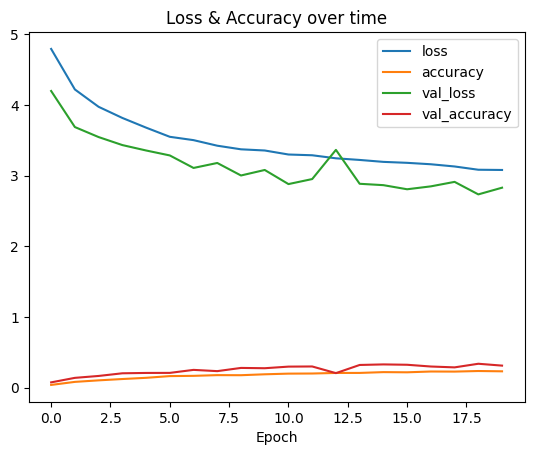

In [42]:
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot(xlabel="Epoch")
plt.title("Loss & Accuracy over time")


In [105]:
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy : ', test_acc)


45/45 [==============================] - 40s 894ms/step - loss: 2.7381 - accuracy: 0.3364
test accuracy :  0.33638283610343933


In [44]:
import os
#Obtención de etiquetas
directorio = data_dir
nombres_carpetas = [nombre for nombre in os.listdir(
    directorio) if os.path.isdir(os.path.join(directorio, nombre))]

diccionario_carpetas = {}

for i, nombre in enumerate(nombres_carpetas):
    diccionario_carpetas[i] = nombre

print(diccionario_carpetas)


{0: 'abigail_williams_(fate)', 1: 'aegis_(persona)', 2: 'aisaka_taiga', 3: 'albedo', 4: 'anastasia_(idolmaster)', 5: 'aqua_(konosuba)', 6: 'arcueid_brunestud', 7: 'asia_argento', 8: 'astolfo_(fate)', 9: 'asuna_(sao)', 10: 'atago_(azur_lane)', 11: 'ayanami_rei', 12: 'belfast_(azur_lane)', 13: 'bremerton_(azur_lane)', 14: 'c.c', 15: 'chitanda_eru', 16: 'chloe_von_einzbern', 17: 'cleveland_(azur_lane)', 18: 'd.va_(overwatch)', 19: 'dido_(azur_lane)', 20: 'emilia_rezero', 21: 'enterprise_(azur_lane)', 22: 'formidable_(azur_lane)', 23: 'fubuki_(one-punch_man)', 24: 'fujibayashi_kyou', 25: 'fujiwara_chika', 26: 'furukawa_nagisa', 27: 'gawr_gura', 28: 'gilgamesh', 29: 'giorno_giovanna', 30: 'hanekawa_tsubasa', 31: 'hatsune_miku', 32: 'hayasaka_ai', 33: 'hirasawa_yui', 34: 'hyuuga_hinata', 35: 'ichigo_(darling_in_the_franxx)', 36: 'illyasviel_von_einzbern', 37: 'irisviel_von_einzbern', 38: 'ishtar_(fate_grand_order)', 39: 'isshiki_iroha', 40: 'jonathan_joestar', 41: 'kamado_nezuko', 42: 'kanam

**Prueba del modelo con imagenes externas**

In [142]:
def predict(img_rel_path, model):

    loaded_model = keras.models.load_model(model)

    img_real = image.load_img(img_rel_path)

    img = image.load_img(img_rel_path, target_size=(96, 96))

    img = image.img_to_array(img, dtype=np.uint8)

    img = np.array(img)/255.0

    p = loaded_model.predict(img[np.newaxis, ...])

    labels = diccionario_carpetas

    predicted_class = labels[np.argmax(p[0], axis=-1)]

    classes = []
    prob = []

    #Obtener los 5 resultados con mayor porcentaje de similitud
    for i, j in enumerate(p[0], 0):
        classes.append(labels[i])
        prob.append(round(j * 100, 2))
    sorted_probs = sorted(zip(classes, prob), key=lambda x: x[1], reverse=True)
    top_classes = [item[0] for item in sorted_probs[:5]]
    top_probs = [item[1] for item in sorted_probs[:5]]
    print("Top 5:")
    for i in range(5):
        print(f"{top_classes[i]} - {top_probs[i]}%")
    plt.title("Es " + predicted_class)
    plt.axis('off')
    plt.imshow(img_real)
    plt.show()

    def plot_bar_x():
        index = np.arange(len(top_classes))
        plt.bar(index, top_probs)
        plt.xlabel('Personaje', fontsize=8)
        plt.ylabel('Probabilidad', fontsize=8)
        plt.xticks(index, top_classes, fontsize=8, rotation=20)
        plt.title('Gráfico de probabilidades')
        plt.show()

    plot_bar_x()


1/1 [==============================] - 0s 247ms/step
Top 5:
giorno_giovanna - 50.34%
jonathan_joestar - 14.49%
katsuragi_misato - 13.49%
lancer - 10.58%
d.va_(overwatch) - 2.06%


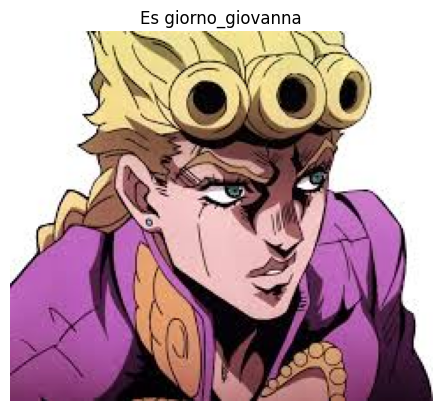

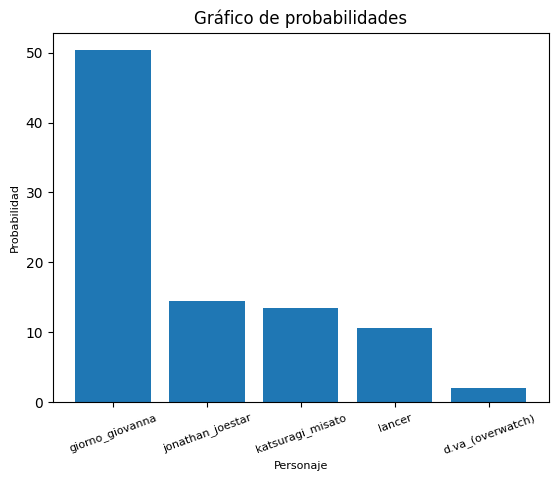

In [143]:
img_face = "../ImagenesPrueba/giorno.jpeg"  # Imagen a clasificar
n_model = "../Modelos/model3.h5"  # Modelo a usar

predict(img_face, n_model)
